<a href="https://colab.research.google.com/github/frnchskolymps/CCMACLRL_EXERCISES_COM222ML/blob/main/Exercise_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [ ]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [94]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display one raw image directly from your drive

In [96]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

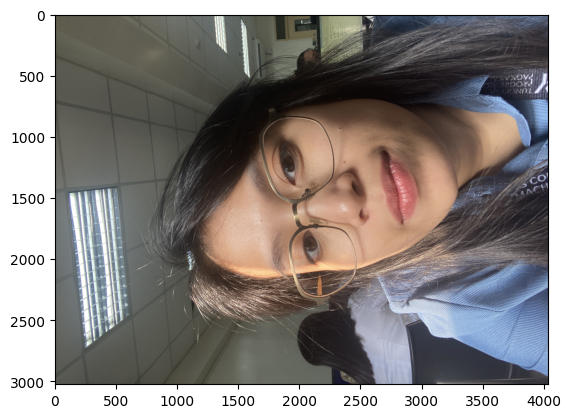

In [97]:
displayImage('/content/drive/MyDrive/Images/Train/OLYMPIA/Copy of Copy of IMG_0483.JPG')

## Load the images from your drive and apply preprocessing to your raw images

In [98]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [99]:
images, labels = load_images_from_folder('/content/drive/MyDrive/Images/Train')

In [100]:
images.shape

(185, 10000)

In [101]:
labels.shape

(185,)

In [102]:
labels

array(['OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA', 'OLYMPIA',
       'OLYMPIA', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS',
       'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS',
       'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS',
       'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS',
       'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', 'ALIS', '

## Display one pre-processed image from the training set

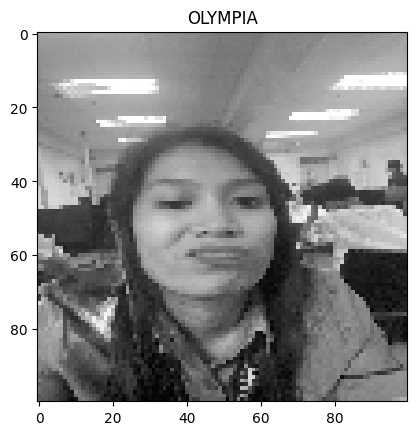

In [104]:
# Get a sample image and its corresponding name
image = images[0].reshape(100,100)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

## Display ten pre-processed images from the training set

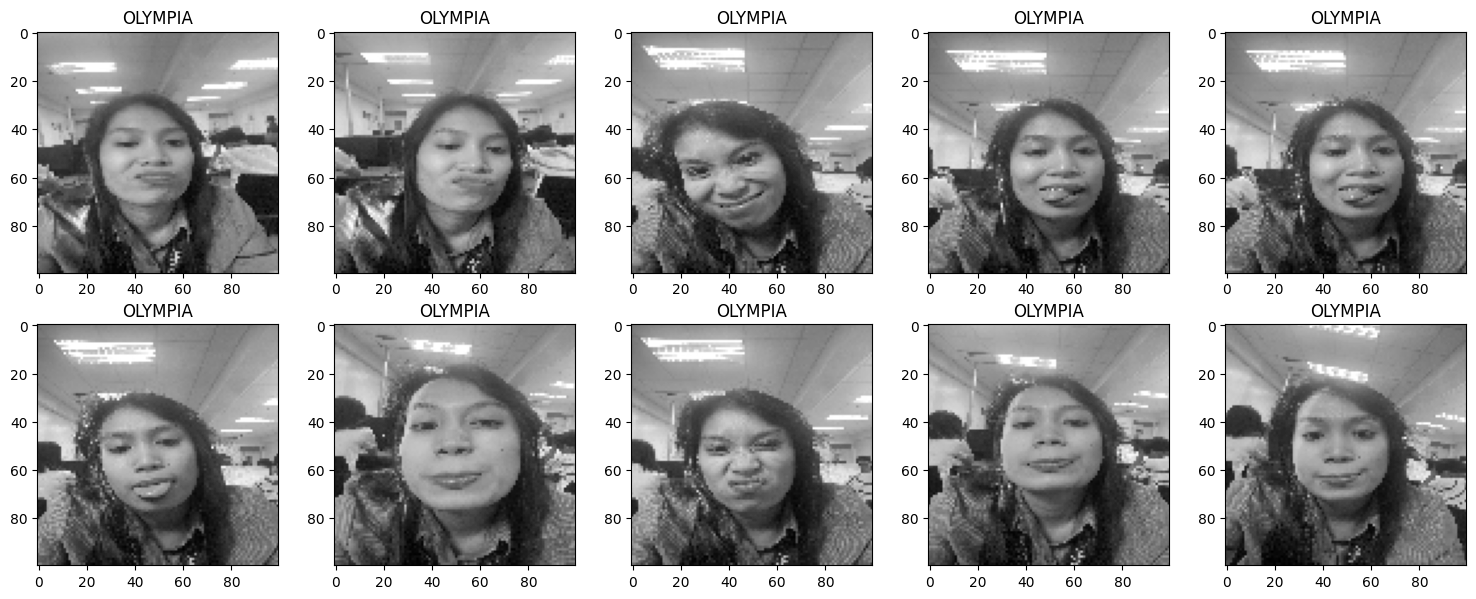

In [105]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split your data

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [107]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [108]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


## Test your model using images not in your training set

Test one image of yourself

In [109]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Test one image of your partner

Predicted label: ['ALIS']


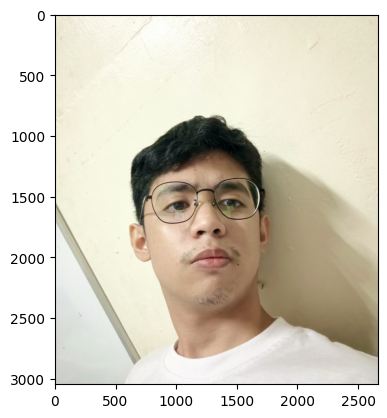

In [110]:
img_path = '/content/drive/MyDrive/Images/Test/Copy of R2.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

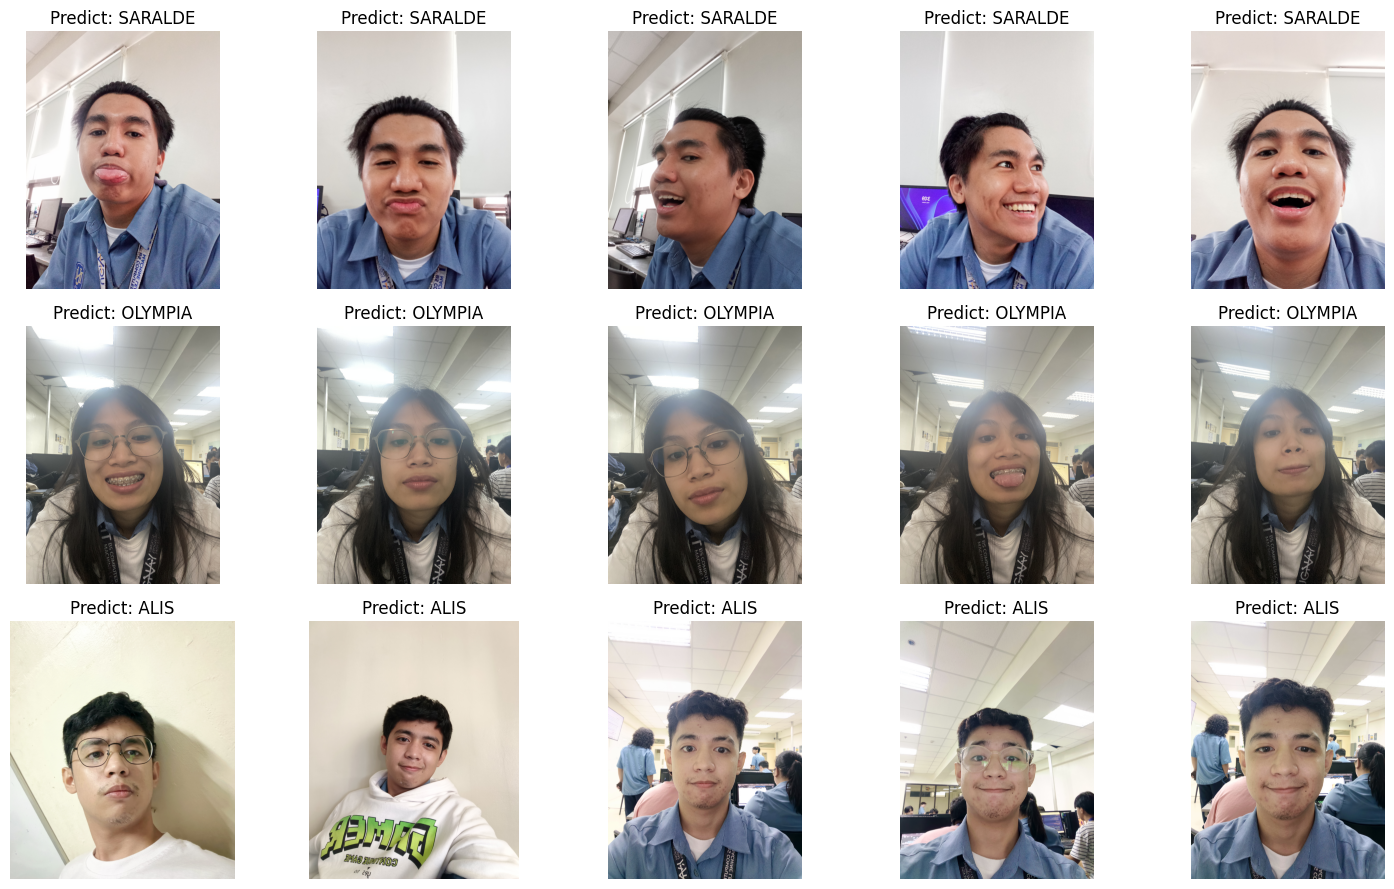

In [111]:
import math

test_folder = '/content/drive/MyDrive/Images/Test/'
image_files = [f for f in os.listdir(test_folder) if f.endswith('.jpg', )]

num_images = len(image_files)
cols = 5  # You want 5 columns
rows = math.ceil(num_images / cols)  # Dynamically calculate rows based on number of images

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

for i, img_file in enumerate(image_files):
    img_path = os.path.join(test_folder, img_file)
    prediction = predict_image(img_path, model)

    # Handle cases where image loading or prediction failed
    if prediction is None:
        continue

    image = cv2.imread(img_path)
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Predict: {prediction[0]}')
    axes[i].axis('off')

# Hide any unused subplots if the number of images is not a multiple of 5
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()